In [1]:
import geopy
from geopy.geocoders import get_geocoder_for_service


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import collections
import hvplot.pandas
import panel as pn
pn.extension('plotly')
import plotly.express as px
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
warnings.filterwarnings('ignore')
import geopy
from geopy.geocoders import Nominatim as nom
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import seaborn as sns
import math


Bad key "text.kerning_factor" on line 4 in
C:\Users\Scott Alexander\anaconda\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from pathlib import Path
csvpath = Path('Combined Dataset.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-12-27     8696.87     8603.62       93.25          0.0  conventional   
2015-12-20     9505.56     9408.07       97.49          0.0  conventional   
2015-12-13     8145.35     8042.21      103.14          0.0  conventional   
2015-12-06     5811.16     5677.40      133.76          0.0  conventional   
2015-11-29     6183.95     5986.26      197.69          0.0  conventional   

              year  region  IS Pandemic  
Date                                     
2015-12-27  2015.0  Albany          0.0  
2015-12-20  2015.0  Albany          0.0  
2015-12-13  2015.0  Albany          0.0  
2015-12-06  2015.0  Albany          0.0  
2015-11-29  2015.0  Albany          0.0

In [5]:

df2=df.groupby(["region","Date"])["AveragePrice"].mean()

# If (region=="Albany")
#     AveragePricevalue=df
#     Albanygroup="AveragePrice"+


In [6]:
df2.hvplot.line(figsize=(90,50),rot=60, title="Average Price by Region")

:Curve   [region]   (AveragePrice)

In [7]:
df3=df.groupby(["Date"])["AveragePrice"].mean()


In [8]:
df3.hvplot.line(figsize=(20,10),rot=60, title="Average Price by Year")

:Curve   [Date]   (AveragePrice)

In [9]:
df4=df.groupby(["AveragePrice"])["year"].mean()

In [10]:
df4.hvplot.hist(figsize=(60,80),rot=60, title="Average Price by Year Histogram")

:Histogram   [year]   (year_count)

In [11]:
df.head()


AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-12-27     8696.87     8603.62       93.25          0.0  conventional   
2015-12-20     9505.56     9408.07       97.49          0.0  conventional   
2015-12-13     8145.35     8042.21      103.14          0.0  conventional   
2015-12-06     5811.16     5677.40      133.76          0.0  conventional   
2015-11-29     6183.95     5986.26      197.69          0.0  conventional   

              year  region  IS Pandemic  
Date                                     
2015-12-27  2015.0  Albany          0.0  
2015-12-20  2015.0  Albany          0.0  
2015-12-13  2015.0  Albany          0.0  
2015-12-06  2015.0  Albany          0.0  
2015-11-29  2015.0  Albany          0.0

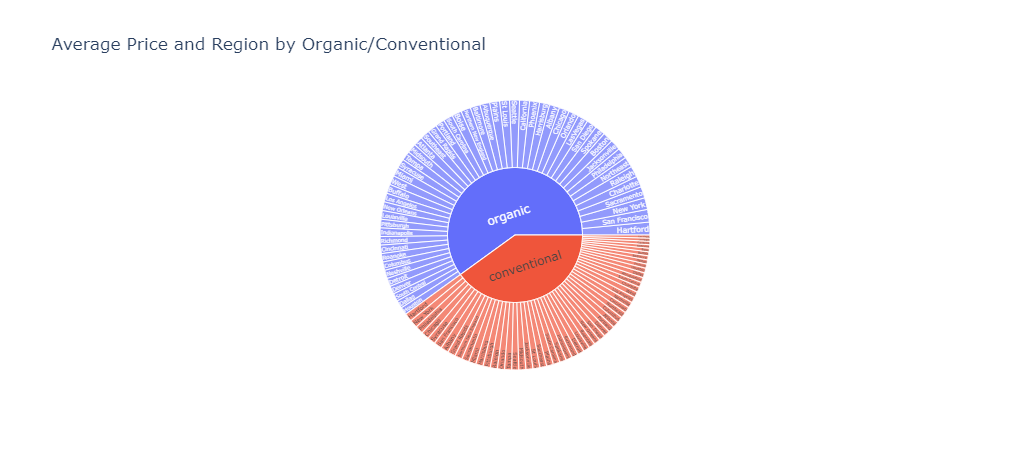

In [12]:

# fig=px.sunburst(df, path=["region","AveragePrice"],values="Date")
# fig.show()   
df_sunburst=df.groupby(["year", "region","type"])["AveragePrice"].mean()
df_sunburst=df_sunburst.reset_index()
fig=px.sunburst(df_sunburst,path=["type","region"], values="AveragePrice", title="Average Price and Region by Organic/Conventional")
fig.show()  

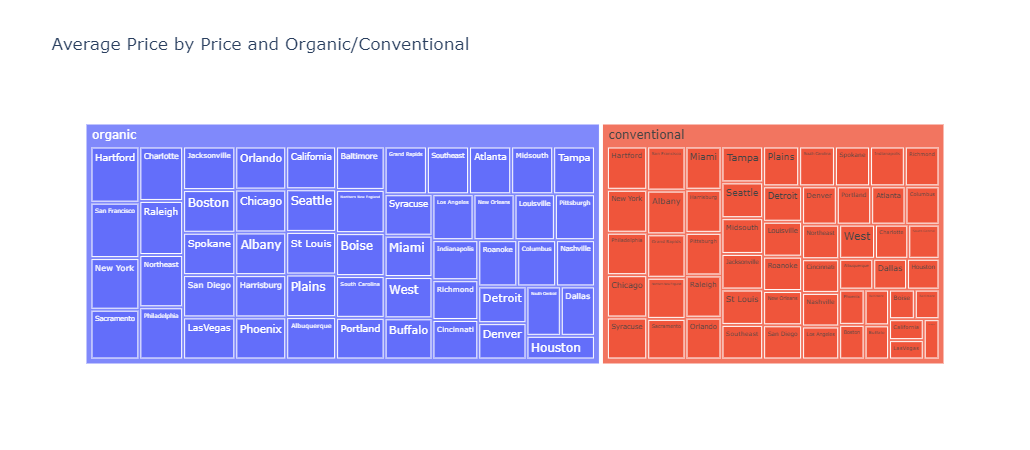

In [13]:
df_treemap=df.groupby(["year", "region","type"])["AveragePrice"].mean()
df_treemap=df_treemap.reset_index()
fig=px.treemap(df_treemap,path=["type","region"], values="AveragePrice", title="Average Price by Price and Organic/Conventional")
fig.show()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


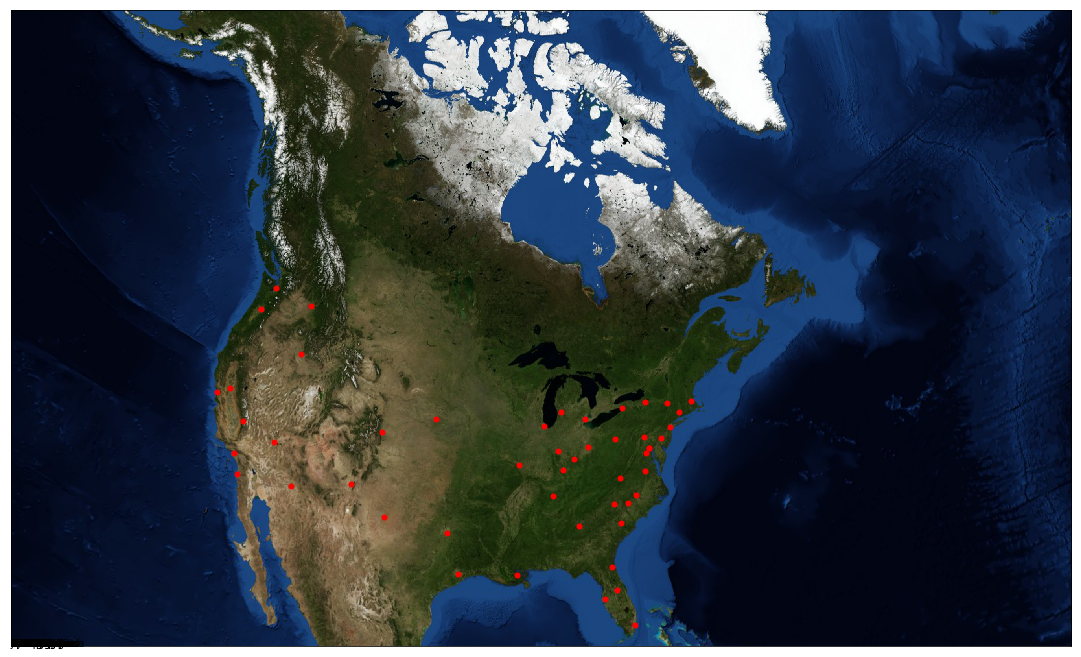

In [14]:
region_list = list(df["region"].unique())
cities = region_list
scale = 1
map = Basemap(width=10000000,height=6000000,projection='lcc',
            resolution=None,lat_1=60.,lat_2=55,lat_0=50,lon_0=-88.)

plt.figure(figsize=(19,20))
map.bluemarble(scale=2)
# Get the location of each city and plot it
# geolocator = Nominatim()
geolocator = Nominatim(user_agent='vdshulyak@gmail.com', timeout=10)

for city in cities:
        loc = geolocator.geocode(city)
        if not loc:
            print("Could not locate {}".format(city))
            continue
        x, y = map(loc.longitude, loc.latitude)
        map.plot(x,y,marker='o',color='Red',markersize=5)
        plt.annotate(city, xy = (x,y), xytext=(-20,20))
plt.show()